# PIERCE PURSELLEY

## JSON data formatting with Python

In [1]:
# Import libraries

In [2]:
import pandas as pd

In [68]:
import json
from pandas.io.json import json_normalize

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# load json data as Pandas dataframe
json_df = pd.read_json('data/world_bank_projects.json')
json_df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [13]:
# exploratory analysis
print(json_df.info())
print("Data Shape", json_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

## Looking for 10 countries with most projects

In [14]:
# Slice df by countries and count them to sort

In [15]:
countries_df = json_df['countryname']

In [19]:
country_project_count = countries_df.value_counts()

In [20]:
country_project_count.head(10)

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Nepal                              12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

In [21]:
# An alternative way would be to groupby country and sort
# A header has been added and the countries have been sorted alphabetically after value

In [22]:
print('Top 10 countries by number of projects in them:')
json_df.groupby('countryname').size().sort_values(ascending=False).head(10)

Top 10 countries by number of projects:


countryname
People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
dtype: int64

In [50]:
# I belive this is the countries have/will take place in.  
# For the countries that are borrowing the money to do these projects...

In [72]:
print('Top 10 countries borrowing for projects:')
borrowing_countries = json_df.groupby('borrower').size().sort_values(ascending=False).head(10)
print(borrowing_countries)

Top 10 countries borrowing for projects:
borrower
MINISTRY OF FINANCE              30
GOVERNMENT OF INDIA              13
SOCIALIST REPUBLIC OF VIETNAM    10
PEOPLE'S REPUBLIC OF CHINA        8
GOVERNMENT OF NEPAL               8
REPUBLIC OF INDONESIA             7
GOVERNMENT OF INDONESIA           6
GOVERNMENT OF BANGLADESH          5
REPUBLIC OF TAJIKISTAN            5
GOVERNMENT OF BURKINA FASO        5
dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

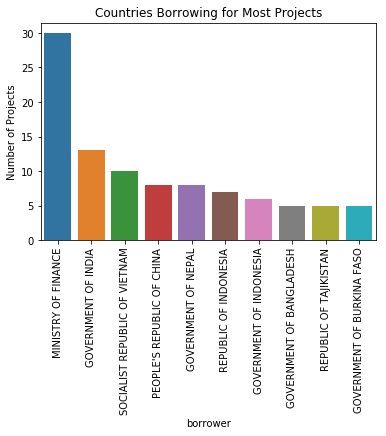

In [75]:
sns.barplot(borrowing_countries.index, borrowing_countries)
plt.title("Countries Borrowing for Most Projects")
plt.ylabel("Number of Projects")
plt.xticks(rotation=90)

In [ ]:
# Financial information dataframe

In [59]:
financialinfo_df = json_df[['country_namecode','borrower','lendprojectcost','lendinginstr','lendinginstrtype','projectfinancialtype']]
financialinfo_df.head()

,country_namecode,borrower,lendprojectcost,lendinginstr,lendinginstrtype,projectfinancialtype
0,Federal Democratic Republic of Ethiopia!$!ET,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,550000000,Investment Project Financing,IN,IDA
1,Republic of Tunisia!$!TN,GOVERNMENT OF TUNISIA,5700000,Specific Investment Loan,IN,OTHER
2,Tuvalu!$!TV,MINISTRY OF FINANCE AND ECONOMIC DEVEL,6060000,Investment Project Financing,IN,IDA
3,Republic of Yemen!$!RY,MIN. OF PLANNING AND INT'L COOPERATION,1500000,Technical Assistance Loan,IN,OTHER
4,Kingdom of Lesotho!$!LS,MINISTRY OF FINANCE,15000000,Investment Project Financing,IN,IDA


In [77]:
financialinfo_df.lendprojectcost.mean()

154724080.0

In [84]:
financialinfo_df.lendprojectcost.max()

5170000000

In [86]:
financialinfo_df.lendprojectcost.min()

30000

In [95]:
#financialinfo_df.groupby('borrower').lendprojectcost.agg(['count','min','max', 'mean'])

In [97]:
# financialinfo_df.groupby(['borrower','lendprojectcost']).groupby('lendprojectcost').head(3)
# projectcost_df = financialinfo_df.groupby(['borrower','lendprojectcost']).agg({'count':sum}).sort_values(['lendprojectcost'],ascending=False)


In [83]:
#financialinfo_df.groupby('borrower').lendprojectcost.mean()

In [76]:
# financialinfo_df.groupby('borrower').apply()
# # QUESTION

In [106]:
# borrowercost_df = financialinfo_df[['borrower','lendprojectcost']]
# borrowercost_df.groupby(['borrower']).sort_values('lendprojectcost')

## Looking for the top 10 major project themes

In [23]:
# Remind myself what the columns are in the df

In [25]:
json_df.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

In [26]:
# Use column 'mjtheme_namecode' as the theme

In [109]:
theme_df = json_df[['mjtheme_namecode']]
theme_df.head()

,mjtheme_namecode
0,"[{'code': '8', 'name': 'Human development'}, {..."
1,"[{'code': '1', 'name': 'Economic management'},..."
2,"[{'code': '5', 'name': 'Trade and integration'..."
3,"[{'code': '7', 'name': 'Social dev/gender/incl..."
4,"[{'code': '5', 'name': 'Trade and integration'..."


In [ ]:
# Clean up column information
# Create new df called theme and take a peek

In [112]:
theme = pd.DataFrame(columns=['code', 'name'])

for row in json_df.mjtheme_namecode:
    theme = theme.append(json_normalize(row))
theme.reset_index(drop=True, inplace=True)

theme.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [115]:
theme = pd.concat(json_normalize(x) for x in json_df.mjtheme_namecode)
theme.head()

,code,name
0,8,Human development
1,11,
0,1,Economic management
1,6,Social protection and risk management
0,5,Trade and integration


In [27]:
# count the number of themes

In [116]:
theme_count = theme.name.value_counts()

In [117]:
print('TOP 10 MAJOR PROJECT THEMES')
theme_count.head()

TOP 10 MAJOR PROJECT THEMES


Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Name: name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

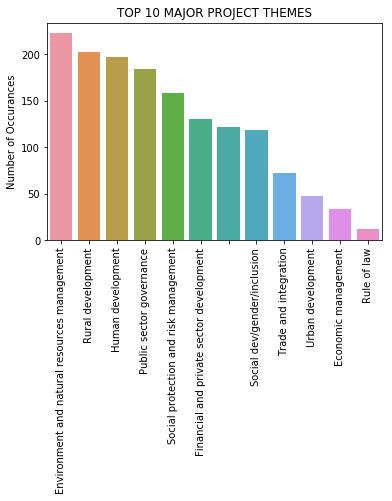

In [122]:
sns.barplot(theme_count.index, theme_count)
plt.title("TOP 10 MAJOR PROJECT THEMES")
plt.ylabel("Number of Occurances")
plt.xticks(rotation=90)